# **Exercise-1: Python, Graph Drawing**

---



In [20]:
!pip install pyforest

In [21]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

# **Graph 1: German Birth Rate Decline Graph**

Data Source: https://www-genesis.destatis.de/genesis//online?operation=statistic&code=12612#abreadcrumb

In [22]:
birth_rate_data=pd.read_excel('/content/German_BirthRate_Data.xlsx')
birth_rate_data

<IPython.core.display.Javascript object>

,Year,Month,Male,Female,Total
0,2018,January,33450,31952,65402
1,2018,February,29978,28511,58489
2,2018,March,32749,30890,63639
3,2018,April,31825,30316,62141
4,2018,May,34494,32899,67393
...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN


In [23]:
birth_rate_data=birth_rate_data[['Year','Month','Total']].dropna()

In [24]:
birth_rate_data['Total'] = pd.to_numeric(birth_rate_data['Total'], errors='coerce')

print(birth_rate_data.dtypes)

<IPython.core.display.Javascript object>

Year      object
Month     object
Total    float64
dtype: object


In [25]:
birth_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    72 non-null     object 
 1   Month   72 non-null     object 
 2   Total   69 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

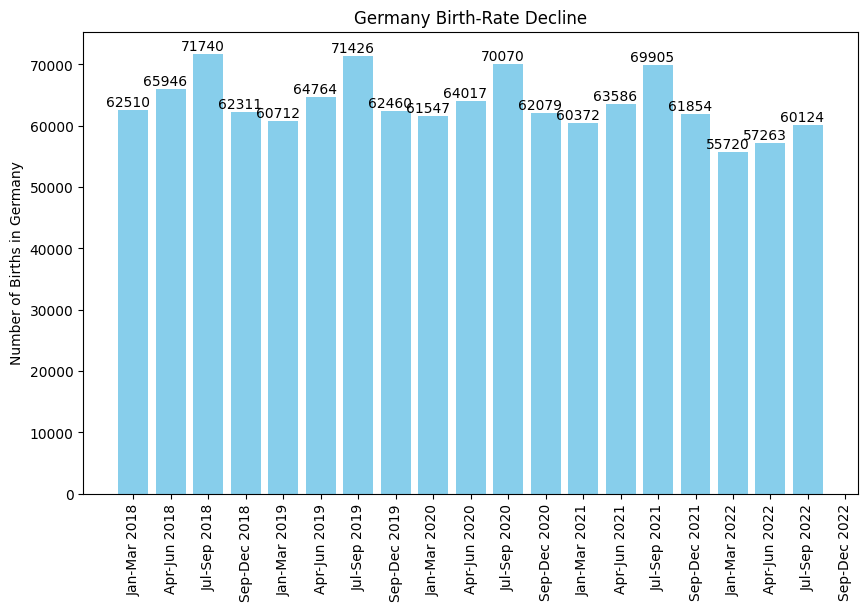

In [26]:

# Converting 'Year' Var to string
birth_rate_data['Year'] = birth_rate_data['Year'].astype(str)

# Created a new column 'Quarter' for required quarter visualization
birth_rate_data['Quarter'] = pd.to_datetime(birth_rate_data['Year'] + '-----' + birth_rate_data['Month']).dt.to_period('Q')

quarterly_data = birth_rate_data.groupby('Quarter')['Total'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(quarterly_data.index.astype(str), quarterly_data, color='skyblue')
plt.title('Germany Birth-Rate Decline')
plt.ylabel('Number of Births in Germany')
plt.xticks(rotation=90)

# Set the x-axis labels directly from the Quarterly data
plt.xticks(range(len(quarterly_data)), [
    'Jan-Mar 2018',
    'Apr-Jun 2018',
    'Jul-Sep 2018',
    'Sep-Dec 2018',
    'Jan-Mar 2019',
    'Apr-Jun 2019',
    'Jul-Sep 2019',
    'Sep-Dec 2019',
    'Jan-Mar 2020',
    'Apr-Jun 2020',
    'Jul-Sep 2020',
    'Sep-Dec 2020',
    'Jan-Mar 2021',
    'Apr-Jun 2021',
    'Jul-Sep 2021',
    'Sep-Dec 2021',
    'Jan-Mar 2022',
    'Apr-Jun 2022',
    'Jul-Sep 2022',
    'Sep-Dec 2022',
    # ... add the rest of the quarters duration
])

# Adding labels to the bars, handling NaN values
for bar, value in zip(bars, quarterly_data):
    if not pd.isna(value):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 100, str(int(value)), ha='center', va='bottom')

plt.show()



# **Graph 2: Israel’s Largest Spike in Deaths in Recent History**

Data Source: https://www.euromomo.eu/graphs-and-maps#z-scores-by-country

In [27]:
israel_data=pd.read_excel('/content/Israel_Killed_data.xlsx')
israel_data.head(5)

<IPython.core.display.Javascript object>

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ISR,Asia,Israel,2020-01-03,NaN,0,NaN,NaN,0,NaN,...,35.4,NaN,2.99,82.97,0.919,9449000,NaN,NaN,NaN,NaN
1,ISR,Asia,Israel,2020-01-04,NaN,0,NaN,NaN,0,NaN,...,35.4,NaN,2.99,82.97,0.919,9449000,NaN,NaN,NaN,NaN
2,ISR,Asia,Israel,2020-01-05,NaN,0,NaN,NaN,0,NaN,...,35.4,NaN,2.99,82.97,0.919,9449000,56.3,5.44,5.44,6.428785
3,ISR,Asia,Israel,2020-01-06,NaN,0,NaN,NaN,0,NaN,...,35.4,NaN,2.99,82.97,0.919,9449000,NaN,NaN,NaN,NaN
4,ISR,Asia,Israel,2020-01-07,NaN,0,NaN,NaN,0,NaN,...,35.4,NaN,2.99,82.97,0.919,9449000,NaN,NaN,NaN,NaN


In [28]:
selected_columns=['date','new_deaths','total_vaccinations_per_hundred']
israel_ds=israel_data[selected_columns].dropna()

In [29]:
israel_ds.head(5)

,date,new_deaths,total_vaccinations_per_hundred
351,2020-12-19,16,0.00
352,2020-12-20,20,0.08
353,2020-12-21,18,0.34
354,2020-12-22,16,0.82
355,2020-12-23,13,1.48


In [30]:
israel_ds.tail(5)

,date,new_deaths,total_vaccinations_per_hundred
1213,2023-04-30,5,197.36
1214,2023-05-01,2,197.36
1215,2023-05-02,2,197.37
1216,2023-05-03,2,197.37
1217,2023-05-04,1,197.37


In [31]:
israel_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 351 to 1217
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            846 non-null    object 
 1   new_deaths                      846 non-null    int64  
 2   total_vaccinations_per_hundred  846 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.4+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

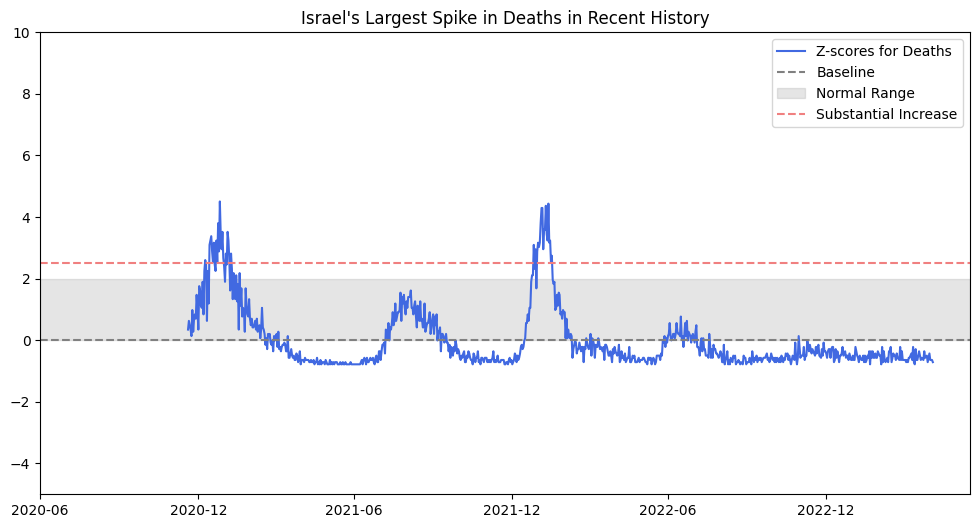

In [32]:

israel_ds['date'] = pd.to_datetime(israel_ds['date'])

# Calculate Z-scores for 'new_deaths'
israel_ds['z_scores_deaths'] = (israel_ds['new_deaths'] - israel_ds['new_deaths'].mean()) / israel_ds['new_deaths'].std()

#Legend Properties: Defining Baseline, Normal Range, and Substantial Increase thresholds for 'new_deaths'
baseline_deaths = 0
normal_range_upper_deaths = 0
substantial_increase_threshold_deaths = 2.5

# Plotting the Line Graph for 'new_deaths'
plt.figure(figsize=(12, 6))
plt.plot(israel_ds['date'], israel_ds['z_scores_deaths'], label='Z-scores for Deaths', color='royalblue')
plt.axhline(y=baseline_deaths, linestyle='--', color='grey', label='Baseline')
plt.axhspan(2, normal_range_upper_deaths, alpha=0.2, color='grey', label='Normal Range')
plt.axhline(y=substantial_increase_threshold_deaths, linestyle='--', color='lightcoral', label='Substantial Increase')

plt.title("Israel's Largest Spike in Deaths in Recent History")
plt.legend()

# Set x-axis ticks to 6-month intervals
start_date = pd.to_datetime('2020-06-01')
end_date = israel_ds['date'].max()
date_ticks = pd.date_range(start=start_date, end=end_date, freq='6M')
plt.xticks(date_ticks, [date.strftime('%Y-%m') for date in date_ticks])

# Set y-axis limits for Z-scores range
plt.ylim(-5, 10)

plt.show()


●
Z-Score is a measure of how extreme a value is, away from the mean

●
Israel’s
largest spike in deaths
in recent history was in February 2022

●
Israel had rolled out 4-doses of the Covid-19 “vaccines” by then

# **Graph 3: Strange Pandemic: MORE Deaths in Ending Year**

Data Source: https://data.cdc.gov/NCHS/AH-Excess-Deaths-by-Sex-Age-and-Race-and-Hispanic-/m74n-4hbs

In [33]:
usa_ds=pd.read_csv('/content/USA_DEATHS_DATA.csv')

<IPython.core.display.Javascript object>

In [34]:
usa_ds=usa_ds.rename(columns={'MMWRyear':'Year','MMWRweek':'Week'})

In [35]:
usa_ds.head(5)

,Year,Week,Deaths (weighted)
0,2015,1,624
1,2016,1,617
2,2017,1,614
3,2018,1,634
4,2019,1,586


In [36]:
usa_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174637 entries, 0 to 174636
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               174637 non-null  int64
 1   Week               174637 non-null  int64
 2   Deaths (weighted)  174637 non-null  int64
dtypes: int64(3)
memory usage: 4.0 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

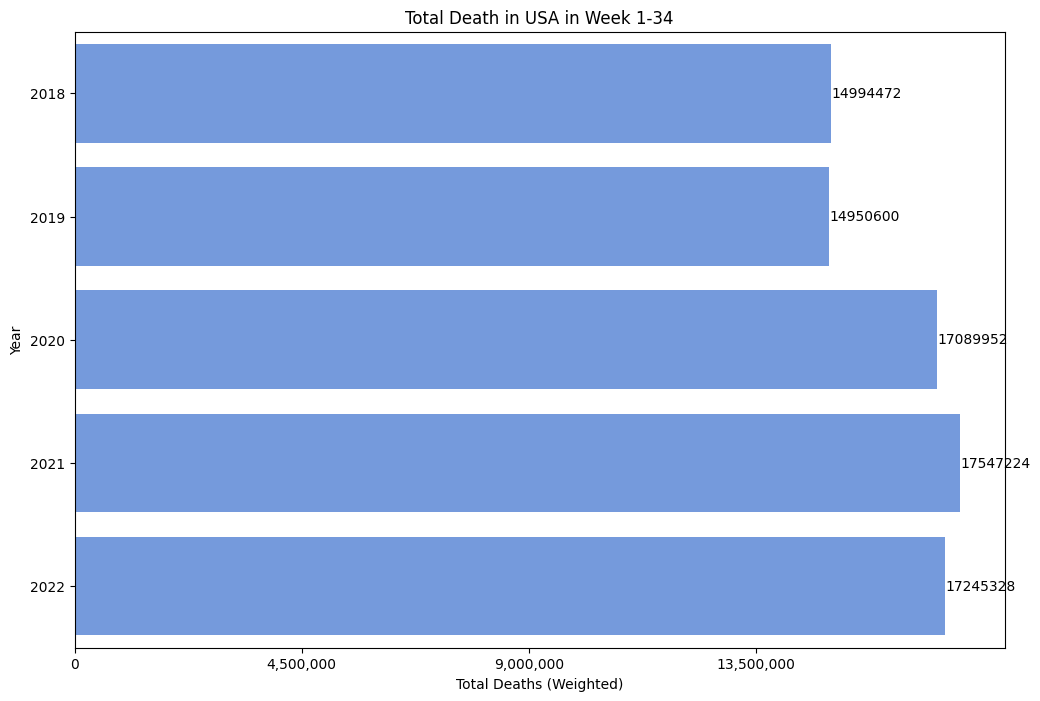

In [37]:

filtered_ds = usa_ds[(usa_ds['Week'] >= 1) & (usa_ds['Week'] <= 34)]
filtered_ds['Year'] = filtered_ds['Year'].astype(str)
filtered_year = ['2018', '2019', '2020', '2021', '2022']

# GroupBy Year and sum the 'Deaths (weighted)' for each Year
total_deaths_per_year = filtered_ds[filtered_ds['Year'].isin(filtered_year)]
total_deaths_per_year = total_deaths_per_year.groupby('Year')['Deaths (weighted)'].sum().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Deaths (weighted)', y='Year', data=total_deaths_per_year, color='cornflowerblue', orient='h')

#labels to the bars
for bar, value in zip(bar_plot.patches, total_deaths_per_year['Deaths (weighted)']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{value}', va='center')

plt.title('Total Death in USA in Week 1-34')
plt.xlabel('Total Deaths (Weighted)')
plt.ylabel('Year')
plt.yticks(range(len(total_deaths_per_year)), [str(year) for year in total_deaths_per_year['Year']])

# Set x-axis ticks to display integers as per the ration range total_deaths_per_year
plt.xticks(range(0, 18000000, 4500000), [f'{int(x):,}' for x in range(0, 18000000, 4500000)])
plt.show()
